In [11]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [12]:
# 2. Đọc file dữ liệu chứng khoán Eximbank và chia tập train test theo tỉ lệ 9:1
df = pd.read_csv('Eximbank.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Chia dữ liệu thành 2 tập train và test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [13]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA phù hợp nhất bằng auto_arima 
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit mô hình
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16858.870, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16870.575, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16857.590, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16859.010, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16868.880, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16856.801, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16858.105, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16857.371, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16855.842, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16857.394, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16857.375, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16854.016, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16857.252, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16855.821, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [15]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán giá đóng cho 30 ngày tiếp theo
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# In ra giá đóng đã được dự đoán trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[20375.91838517 20399.0400341  20413.51402027 20422.57463166
 20428.24650932 20431.797064   20434.01968573 20435.41103097
 20436.2820031  20436.8272254  20437.16853064 20437.38218527
 20437.51593154 20437.59965574 20437.65206648 20437.68487524
 20437.70541328 20437.71826995 20437.72631813 20437.73135623
 20437.73451005 20437.73648432 20437.73772019 20437.73849384
 20437.73897814 20437.73928131 20437.73947109 20437.73958989
 20437.73966426 20437.73971082]


In [16]:
# 6. Tính độ đo RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 2085.3548131787647


In [17]:
# 7. Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 10.55230991178177


In [18]:
# 8. Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing MAE: 1926.819869210574


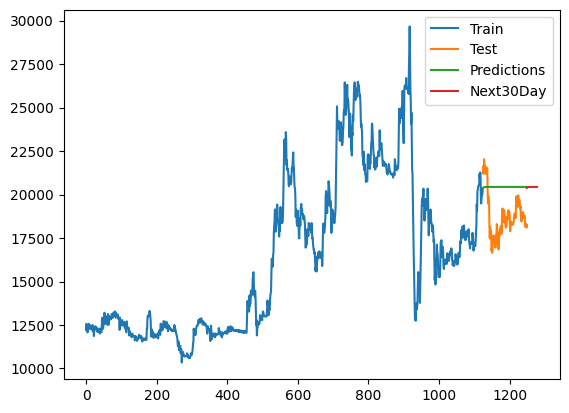

In [19]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

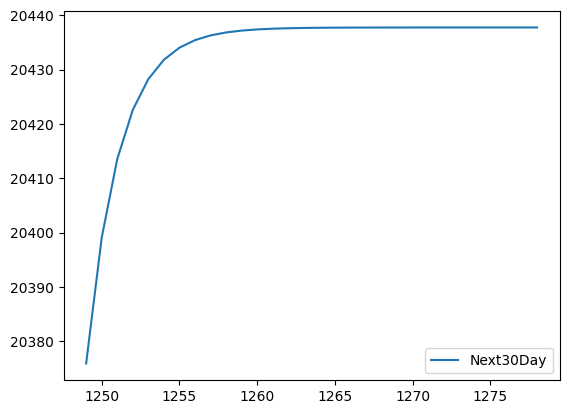

In [20]:
plt.plot(last_data,y_next_30_days)
plt.legend(['Next30Day'])
plt.show()